In [1]:
cd '/content/drive/MyDrive/shogi'

/content/drive/MyDrive/shogi


In [2]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#60 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．


In [3]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary= True)

#結果
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

# 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．





In [4]:
#結果
print(model.similarity('United_States', 'U.S.'))

0.73107743


# 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [5]:
#結果
print(model.most_similar('United_States', topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


# 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [6]:
#結果
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


# 64. アナロジーデータでの実験

単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [7]:
import pandas as pd
df = pd.read_csv('questions-words.txt', sep=' ', header=0, names=['word1','word2','word3','word4'])
df =df[df['word1'] != ':']

print(df[8865:8870])

        word1      word2        word3         word4
8869    uncle       aunt         sons     daughters
8870    uncle       aunt  stepbrother    stepsister
8871    uncle       aunt   stepfather    stepmother
8872    uncle       aunt      stepson  stepdaughter
8874  amazing  amazingly     apparent    apparently


In [8]:
import pandas as pd
df = pd.read_csv('questions-words.txt', sep=' ', header=0, names=['word1','word2','word3','word4'])
df =df[df['word1'] != ':']

#時間的制約につき、アナロジーデータの50行分のみ行う
df1 = df[0:50]
df2 = df[8870:8920]
df = pd.concat([df1, df2])
vec_list = model[df['word2']] - model[df['word1']] + model[df['word3']]

similar_words =[]
degree_of_similarity =[]


for i in range(len(vec_list)):
  similar = model.most_similar(vec_list[i], topn=1)
  similar_words.append(similar[0][0])
  degree_of_similarity.append(similar[0][1])

df['similar_word'] = similar_words
df['degree_of_similarity'] = degree_of_similarity
  
df.head()

,word1,word2,word3,word4,similar_word,degree_of_similarity
0,Athens,Greece,Baghdad,Iraq,Baghdad,0.748983
1,Athens,Greece,Bangkok,Thailand,Bangkok,0.743114
2,Athens,Greece,Beijing,China,China,0.718659
3,Athens,Greece,Berlin,Germany,Germany,0.672089
4,Athens,Greece,Bern,Switzerland,Bern,0.690234


# 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [9]:
#結果
#ただし、意味的アナロジーは「capital-common-countries」上位50行、
#文法的アナロジーは「gram1-adjective-to-adverb」上位50行を対象としている。
print(f"意味的アナロジー: {df[0:50]['degree_of_similarity'].mean()}")
print(f"文法的アナロジー: {df[51:100]['degree_of_similarity'].mean()}")

意味的アナロジー: 0.7217315006256103
文法的アナロジー: 0.7008928474114866


# 66. WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [10]:
!wget --no-check-certificate http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-06-11 17:27:11--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2023-06-11 17:27:11--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0.01s   

2023-06-11 17:27:11 (1.59 MB/s) - ‘wordsim353.zip.1’ saved [23257/23257]

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]l

In [11]:
import numpy as np

df = pd.read_csv('combined.csv', sep=',')

degree_of_similarity =[]

for i in range(len(df)):
  similar = model.similarity(df['Word 1'][i], df['Word 2'][i])
  degree_of_similarity.append(similar)

df['degree_of_similarity'] = degree_of_similarity

#スピアマン相関係数
spearman_corr = df[['Human (mean)', 'degree_of_similarity']].corr(method='spearman')
print(spearman_corr)

                      Human (mean)  degree_of_similarity
Human (mean)              1.000000              0.700017
degree_of_similarity      0.700017              1.000000


# 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．



In [12]:
#国名を64のデータから取得
df = pd.read_csv('questions-words.txt', sep=' ', header=0, names=['word1','word2','word3','word4'])
df = df[df['word1'] != ':']
df = df[0:5030]
countries = df['word2'].unique().tolist()

#国名に関する単語ベクトルを抽出
countries_vec =[]
for country in countries:
  country_vec= model[country]
  countries_vec.append(country_vec)

#k-meansクラスタリング
from sklearn.cluster import KMeans

n = 5
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(countries_vec)
for i in range(n):
  cluster = np.where(kmeans.labels_ == i)[0]
  print(f'cluster: {i}')
  print(', '.join([countries[k] for k in cluster]))
  
  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 0
China, Germany, Switzerland, Australia, Finland, England, Spain, Norway, Canada, France, Italy, Sweden, Japan, Jordan, Belgium, Denmark, Qatar, Ireland, Portugal, Bahrain, Oman, Greenland, Morocco, Liechtenstein, Malta, Austria
cluster: 1
Thailand, Cuba, Samoa, Belize, Venezuela, Bangladesh, Tuvalu, Guyana, Indonesia, Nepal, Jamaica, Peru, Nicaragua, Philippines, Uruguay, Bahamas, Suriname, Ecuador, Dominica, Chile, Fiji, Taiwan, Honduras, Bhutan, Laos
cluster: 2
Nigeria, Ghana, Algeria, Madagascar, Mali, Gambia, Burundi, Guinea, Senegal, Botswana, Zimbabwe, Uganda, Rwanda, Gabon, Malawi, Angola, Zambia, Mozambique, Liberia, Kenya, Niger, Mauritania, Namibia
cluster: 3
Greece, Russia, Turkey, Turkmenistan, Kazakhstan, Azerbaijan, Serbia, Kyrgyzstan, Slovakia, Romania, Hungary, Moldova, Tajikistan, Ukraine, Slovenia, Belarus, Cyprus, Montenegro, Latvia, Macedonia, Bulgaria, Estonia, Uzbekistan, Georgia, Albania, Lithuania, Poland, Armenia, Croatia
cluster: 4
Iraq, Egypt, Viet

# 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

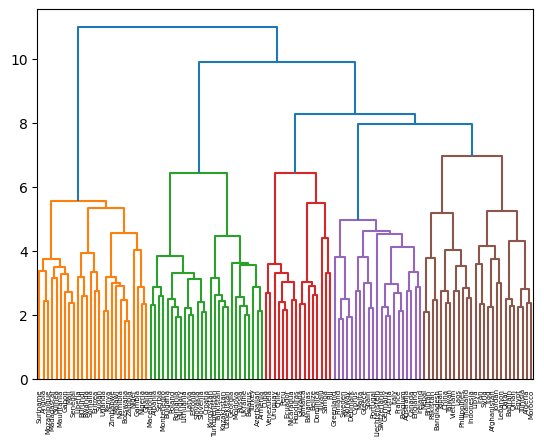

In [13]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Ward法によるクラスタリング
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)

plt.show()

# 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

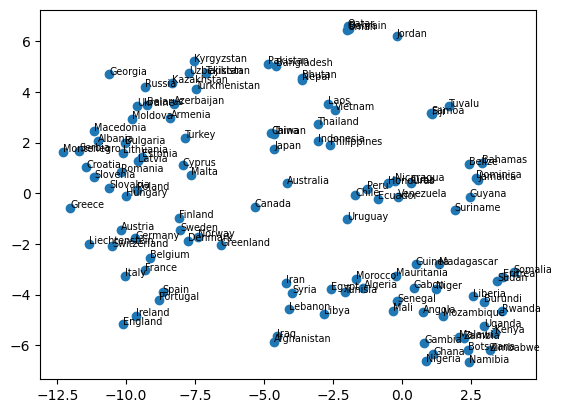

In [14]:
from sklearn.manifold import TSNE

countries_vec2 = np.array(countries_vec)
tsne = TSNE(random_state=42, n_iter=15000, metric='cosine')
embs = tsne.fit_transform(countries_vec2)

plt.scatter(np.array(embs).T[0], np.array(embs).T[1])
for (x, y), name in zip(embs, countries):
  plt.annotate(name, (x, y), size ='x-small')
plt.show()